# Questionnaires and Surveys: Analyses with R
tutorial from author: Martin Schweinberger @manual{uqslc2022ladal, author = {Schweinberger, Martin}, title = {The Language Technology and Data Analysis Laboratory (LADAL)}, note = {https://ladal.edu.au}, year = {2022}, organization = {The University of Queensland, School of Languages and Cultures}, address = {Brisbane}, edition = {2022.11.03} }

Design Basics 
Survey Questionnaires elicit three types of data:

Factual 
Behavioral 
Attitudinal 

While factual and behavioral questions are about what the respondent is and does, attitudinal questions tap into what the respondent thinks or feels.

# Visualising survey data

In [28]:
# install packages
install.packages("knitr")
install.packages("lattice")
install.packages("tidyverse")
install.packages("likert")
install.packages("MASS")
install.packages("psych")
install.packages("viridis")
install.packages("ggplot2")
install.packages("here")
install.packages("flextable")
install.packages("devtools")
install.packages("GPArotation")
# devtools::install_github("matherion/userfriendlyscience", dependencies=T)
install.packages("ufs")
# install klippy for copy-to-clipboard button in code chunks
install.packages("remotes")
remotes::install_github("rlesur/klippy")

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Skipping install of 'klippy' from a github remote, the SHA1 (378c247f) has not changed since last instal

In [29]:
# set options
options(stringsAsFactors = F)         # no automatic data transformation
options("scipen" = 100, "digits" = 4) # suppress math annotation
# install packages
library(knitr)
library(lattice)
library(tidyverse)
library(likert)
library(MASS)
library(psych)
library(viridis)
library(ggplot2)
library(here)
library(flextable)
library(devtools)
# library(userfriendlyscience)
# activate klippy for copy-to-clipboard button
klippy::klippy()

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ stringr 1.4.0
✔ tidyr   1.1.4     ✔ forcats 0.5.1
✔ readr   2.1.1     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: xtable


Attaching package: ‘likert’


The following object is masked from ‘package:dplyr’:

    recode



Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select



Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha


Loading required package: viridisLite

here() starts at /home/jovyan


Attaching package: ‘flextable’


The following object is masked from ‘package:xtable’:

    align


The following object is masked from ‘package:purrr’:

    compose


Loading required package: usethis



Shiny tags cannot be represented in plain text (need html)

# Read Data

In [30]:
# define color vectors
clrs3 <- c("firebrick4",  "gray70", "darkblue")
clrs5 <- c("firebrick4", "firebrick1", "gray70", "blue", "darkblue")
# load data
ldat <- base::readRDS(url("https://slcladal.github.io/data/lid.rda", "rb"))

In [92]:
# Understanding data file
print("Fist 6 records of survey data")
head(ldat)
str(ldat)
print("Summary of content")
ldat %>% group_by (Course, Satisfaction) %>% summarise(n())
print("Checking NA")
mean(ldat,na.rm=TRUE)
print("Checking NULL values")
is.null(ldat)

[1] "Fist 6 records of survey data"


,Course,Satisfaction
,<chr>,<int>
1,Chinese,1
2,Chinese,1
3,Chinese,1
4,Chinese,1
5,Chinese,1
6,Chinese,1


'data.frame':	300 obs. of  2 variables:
 $ Course      : chr  "Chinese" "Chinese" "Chinese" "Chinese" ...
 $ Satisfaction: int  1 1 1 1 1 1 1 1 1 1 ...
[1] "Summary of content"


`summarise()` has grouped output by 'Course'. You can override using the `.groups` argument.



Course,Satisfaction,n()
<chr>,<int>,<int>
Chinese,1,20
Chinese,2,30
Chinese,3,25
Chinese,4,10
Chinese,5,15
German,1,40
German,2,25
German,3,15
German,4,15


[1] "Checking NA"


Warning message in mean.default(ldat, na.rm = TRUE):
“argument is not numeric or logical: returning NA”


[1] NA

[1] "Checking NULL values"


[1] FALSE

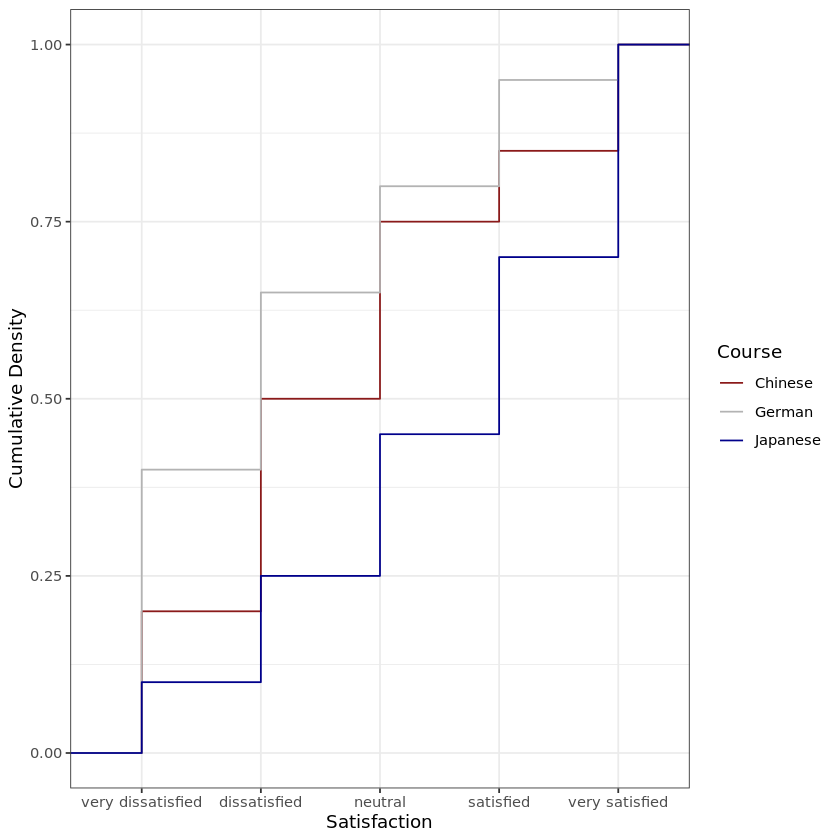

In [38]:
# create cumulative density plot
ldat %>%
  ggplot(aes(x = Satisfaction, color = Course)) + 
  geom_step(aes(y = ..y..), stat = "ecdf") +
  labs(y = "Cumulative Density") + 
  scale_x_discrete(limits = c("1","2","3","4","5"), 
                   breaks = c(1,2,3,4,5),
                   labels=c("very dissatisfied", "dissatisfied", 
                            "neutral", "satisfied", "very satisfied")) + 
  scale_colour_manual(values = clrs3) + 
  theme_bw() 

# Pie charts

Satisfaction,Frequency,Percent
<fct>,<int>,<dbl>
very dissatisfied,70,23.3
dissatisfied,70,23.3
neutral,60,20.0
satisfied,50,16.7
very satisfied,50,16.7


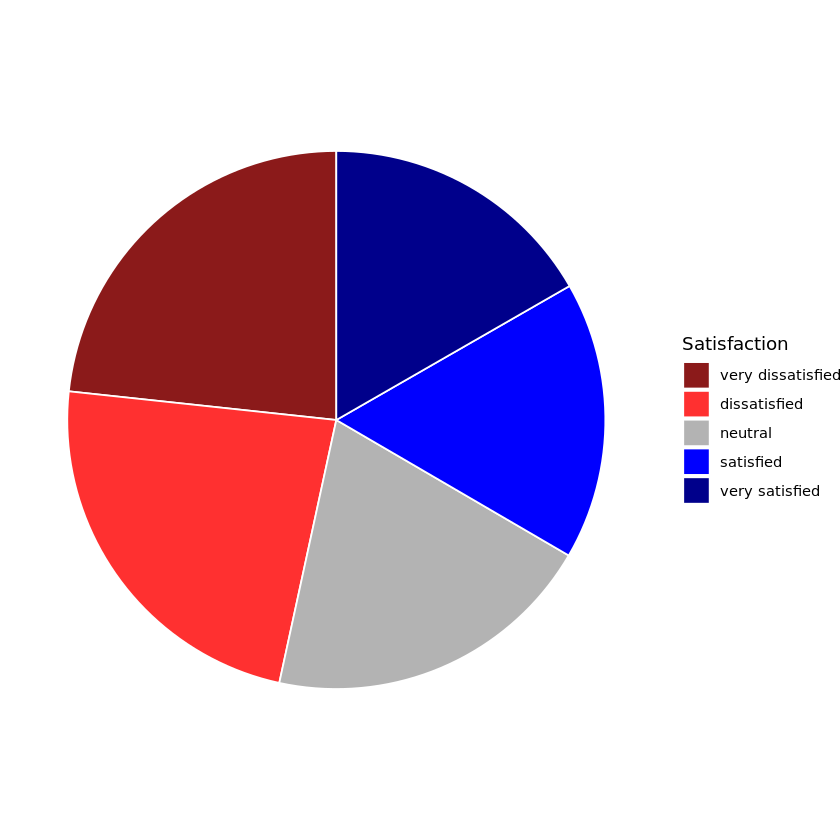

In [46]:
# create bar plot data
bdat <- ldat %>%
  dplyr::group_by(Satisfaction) %>%
  dplyr::summarise(Frequency = n()) %>%
  dplyr::mutate(Percent = round(Frequency/sum(Frequency)*100, 1)) %>%
  # order the levels of Satisfaction manually so that the order is not alphabetical
  dplyr::mutate(Satisfaction = factor(Satisfaction, 
                                      levels = 1:5,
                                      labels = c("very dissatisfied",
                                                 "dissatisfied", 
                                                 "neutral", 
                                                 "satisfied", 
                                                 "very satisfied")))
# check new dataset
bdat

# create pie chart
bdat %>%
  ggplot(aes("", Percent, fill = Satisfaction)) + 
  geom_bar(stat="identity", width=1, color = "white") +
  coord_polar("y", start=0) +
  scale_fill_manual(values = clrs5) +
  theme_void()


Satisfaction,Frequency,Percent,Position
<fct>,<int>,<dbl>,<dbl>
very satisfied,50,16.7,8.35
satisfied,50,16.7,25.05
neutral,60,20.0,43.40
dissatisfied,70,23.3,65.05
very dissatisfied,70,23.3,88.35


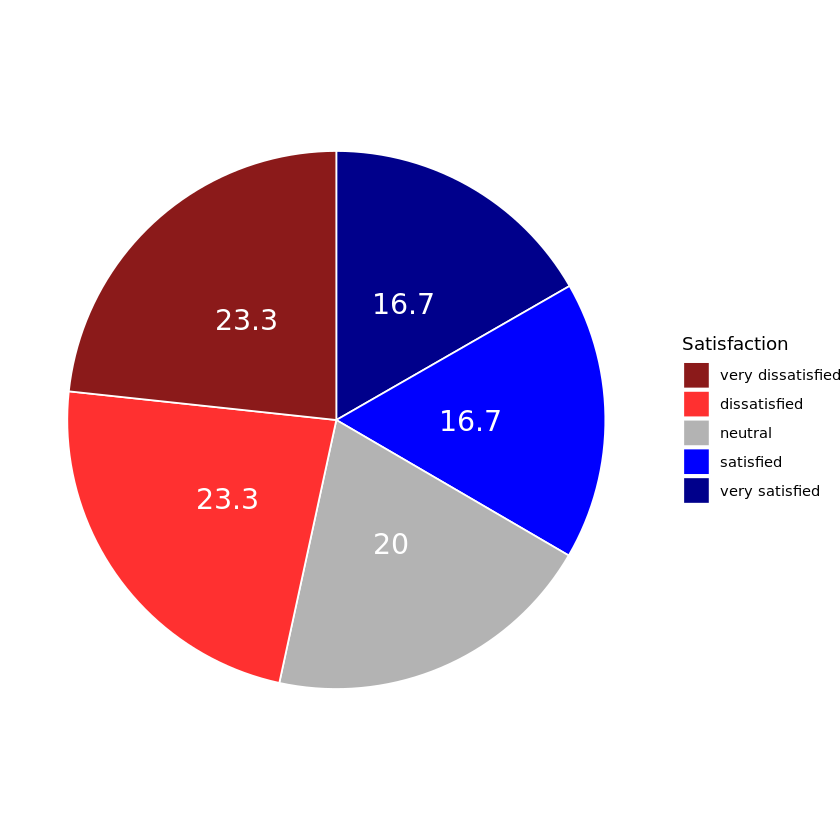

In [47]:
#To place the labels where they make sense, we will add another variable to the data called “Position”.
pdat <- bdat %>%
  dplyr::arrange(desc(Satisfaction)) %>%
  dplyr::mutate(Position = cumsum(Percent)- 0.5*Percent)

pdat

# create pie chart
pdat %>%
  ggplot(aes("", Percent, fill = Satisfaction)) + 
  geom_bar(stat="identity", width=1, color = "white") +
  coord_polar("y", start=0) +
  scale_fill_manual(values = clrs5) +
  theme_void() +
  geom_text(aes(y = Position, label = Percent), color = "white", size=6)

We will now create separate pie charts for each course. In a first step, we create a data set that does not only contain the Satisfaction levels and their frequency but also the course.

In [49]:
# create grouped pie data
gldat <- ldat %>%
  dplyr::group_by(Course, Satisfaction) %>%
  dplyr::summarise(Frequency = n()) %>%
  dplyr::mutate(Percent = round(Frequency/sum(Frequency)*100, 1),
                Satisfaction = factor(Satisfaction, 
                                      levels = 1:5,
                                      labels = c("very dissatisfied",
                                                 "dissatisfied", 
                                                 "neutral", 
                                                 "satisfied", 
                                                 "very satisfied"))) %>%
  dplyr::arrange(desc(Satisfaction)) %>%
  dplyr::mutate(Position = cumsum(Percent)- 0.5*Percent)

gldat

`summarise()` has grouped output by 'Course'. You can override using the `.groups` argument.



Course,Satisfaction,Frequency,Percent,Position
<chr>,<fct>,<int>,<dbl>,<dbl>
Chinese,very satisfied,15,15,7.5
German,very satisfied,5,5,2.5
Japanese,very satisfied,30,30,15.0
Chinese,satisfied,10,10,20.0
German,satisfied,15,15,12.5
Japanese,satisfied,25,25,42.5
Chinese,neutral,25,25,37.5
German,neutral,15,15,27.5
Japanese,neutral,20,20,65.0


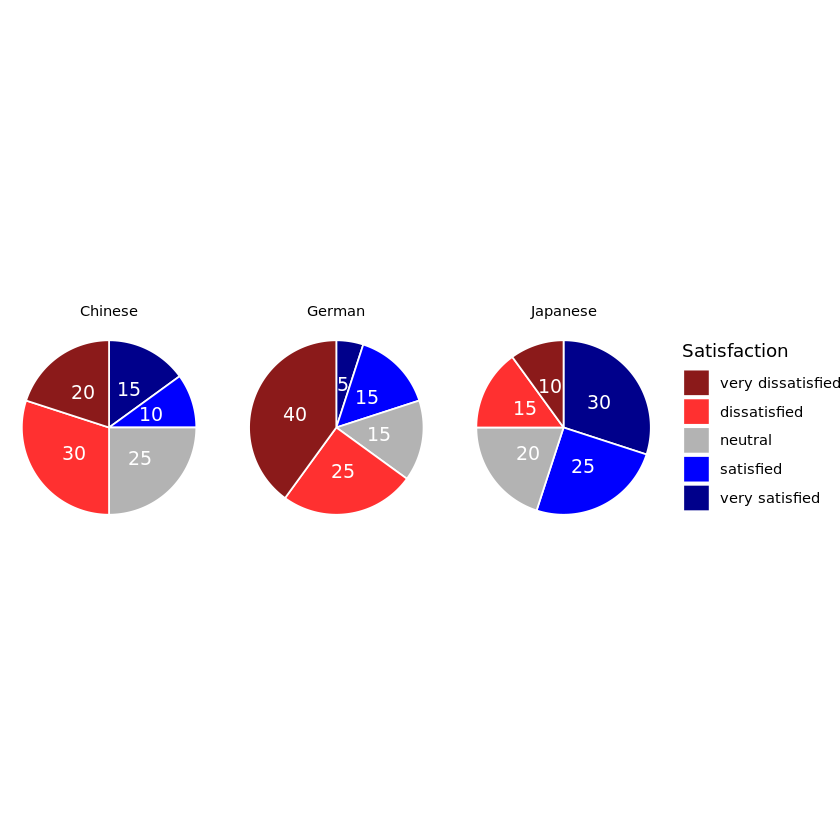

In [50]:
# plot separate pie charts for each course.
# create pie chart
gldat %>%
  ggplot(aes("", Percent, fill = Satisfaction)) + 
  facet_wrap(~Course) +
  geom_bar(stat="identity", width=1, color = "white") +
  coord_polar("y", start=0) +
  scale_fill_manual(values = clrs5) +
  theme_void() +
  geom_text(aes(y = Position, label = Percent), color = "white", size=4)

# Bar Plots

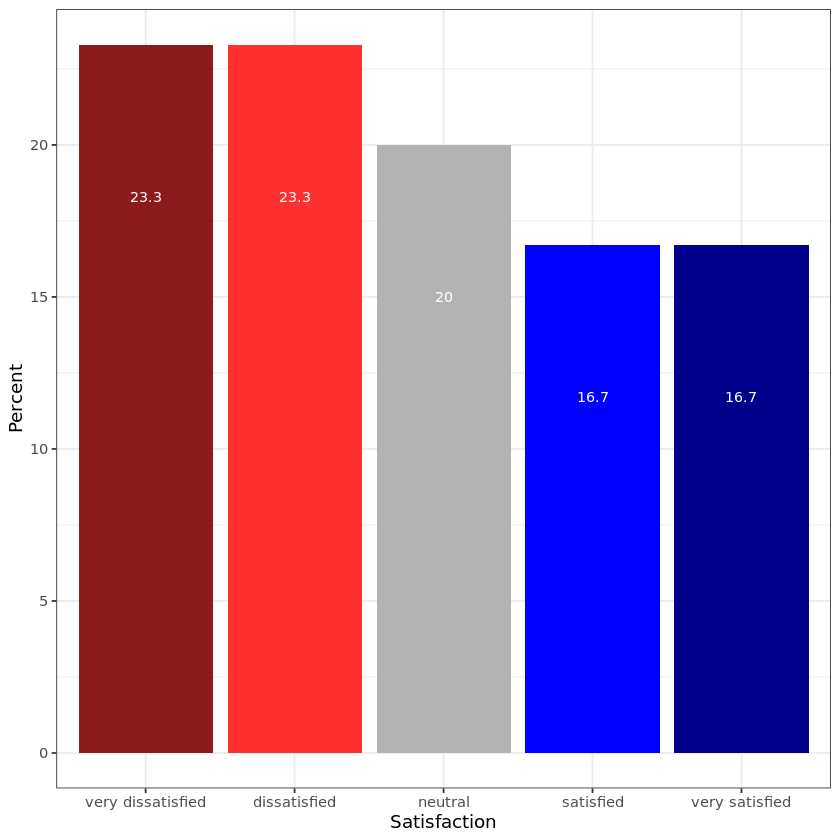

In [51]:
# bar plot
bdat %>%
  ggplot(aes(Satisfaction, Percent, fill = Satisfaction)) +
  # determine type of plot
  geom_bar(stat="identity") +          
  # use black & white theme
  theme_bw() +                         
  # add and define text
  geom_text(aes(y = Percent-5, label = Percent), color = "white", size=3) + 
  # add colors
  scale_fill_manual(values = clrs5) +
  # suppress legend
  theme(legend.position="none")

In [53]:
# create bar plot data
gldat <- ldat %>%
  dplyr::group_by(Course, Satisfaction) %>%
  dplyr::summarise(Frequency = n()) %>%
  dplyr::mutate(Percent = round(Frequency/sum(Frequency)*100, 1)) %>%
  dplyr::mutate(Satisfaction = factor(Satisfaction, 
                                      levels = 1:5,
                                      labels = c("very dissatisfied",
                                                 "dissatisfied", 
                                                 "neutral", 
                                                 "satisfied", 
                                                 "very satisfied")))
gldat

`summarise()` has grouped output by 'Course'. You can override using the `.groups` argument.



Course,Satisfaction,Frequency,Percent
<chr>,<fct>,<int>,<dbl>
Chinese,very dissatisfied,20,20
Chinese,dissatisfied,30,30
Chinese,neutral,25,25
Chinese,satisfied,10,10
Chinese,very satisfied,15,15
German,very dissatisfied,40,40
German,dissatisfied,25,25
German,neutral,15,15
German,satisfied,15,15


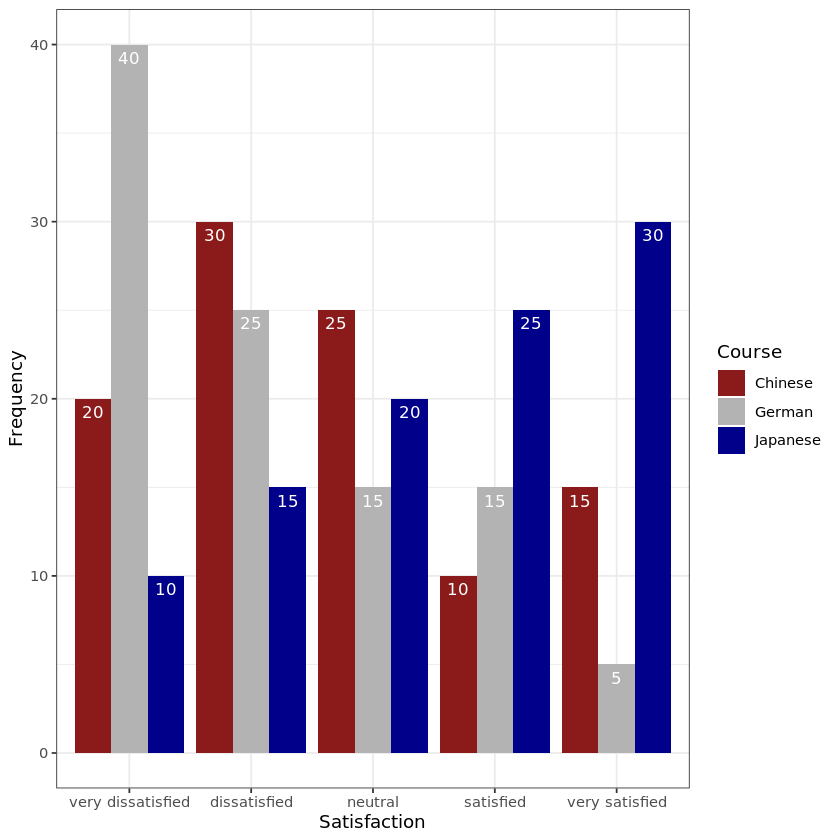

In [54]:
# bar plot
gldat %>%
  ggplot(aes(Satisfaction, Frequency, fill = Course)) + 
  geom_bar(stat="identity", position = position_dodge()) +
  # define colors
  scale_fill_manual(values = clrs3) + 
  # add text
  geom_text(aes(label=Frequency), vjust=1.6, color="white", 
            # define text position and size
            position = position_dodge(0.9),  size=3.5) + 
  theme_bw()                         

Bar plots are particularly useful when visualizing data obtained through Likert items. As this is a very common issue that empirical researchers face. There are two basic ways to display Likert items using bar plots: grouped bar plots and more elaborate scaled bar plots.

Although we have seen above how to create grouped bar plots, we will repeat it here with the language course example used above when we used cumulative density line graphs to visualize how to display Likert data.

In a first step, we recreate the data set which we have used above. The data set consists of a Likert-scaled variable (Satisfaction) which represents rating of students from three courses about how satisfied they were with their language-learning course. The response to the Likert item is numeric so that “strongly disagree/very dissatisfied” would get the lowest and “strongly agree/very satisfied” the highest numeric value.

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?



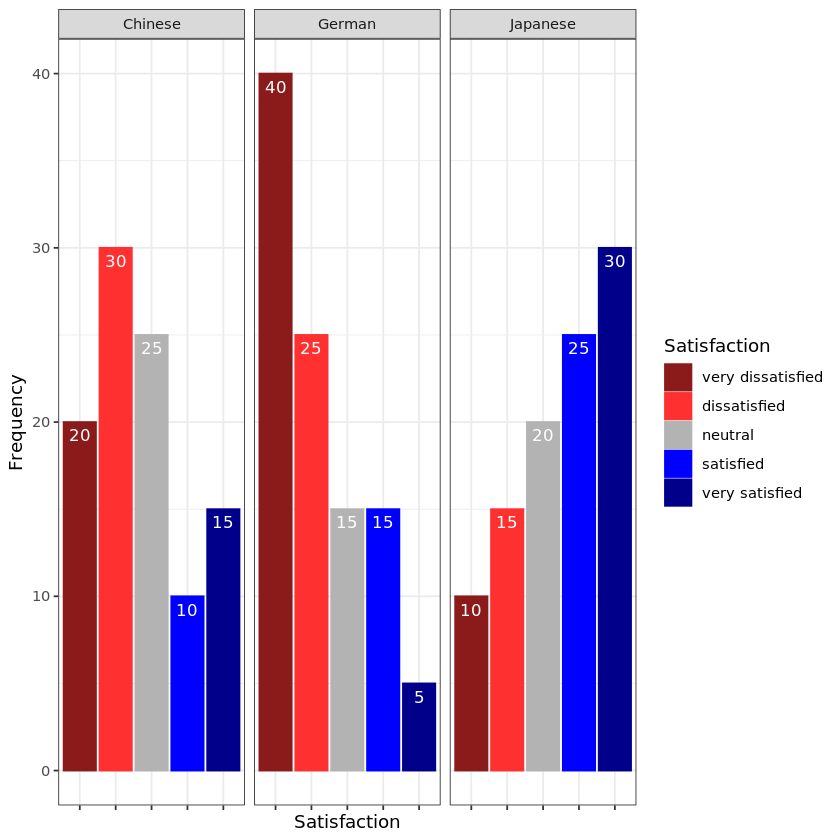

In [55]:
# plot separate bar graphs for each class by specifying “facets”.

# create grouped bar plot
gldat %>%
  ggplot(aes(Satisfaction, Frequency, 
             fill = Satisfaction, 
             color = Satisfaction)) +
  facet_grid(~Course) +
  geom_bar(stat="identity", position=position_dodge()) +
  geom_line() +
  # define colors
  scale_fill_manual(values=clrs5) +
  scale_color_manual(values=clrs5) +
  # add text and define color
  geom_text(aes(label=Frequency), vjust=1.6, color="white", 
            # define text position and size
            position = position_dodge(0.9),  size=3.5) +     
  theme_bw() +
  theme(axis.text.x=element_blank())

Another and very interesting way to display such data is by using the Likert package. In a first step, we need to activate the package, clean the data, and extract a subset for the data visualization example.

One aspect that is different to previous visualizations is that, when using the Likert package, we need to transform the data into a “likert” object (which is, however, very easy and is done by using the “likert()” function as shown below).

In [60]:
sdat  <- base::readRDS(url("https://slcladal.github.io/data/sdd.rda", "rb"))
head(sdat)
colnames(sdat)

,Group,Respondent,How.did.you.like.the.course.,How.did.you.like.the.teacher.,Was.the.content.intersting.,Was.the.content.adequate.for.the.course.,Were.there.enough.discussions.,Was.the.use.of.online.materials.appropriate.,Was.the.teacher.appropriately.prepared.,Was.the.workload.of.the.course.appropriate.,Was.the.course.content.enganging.,Were.there.enough.interactive.exerceises.included.in.the.sessions.
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,German,G1,4,4,4,4,4,4,4,4,4,4
2,German,G2,4,5,3,4,4,4,5,3,1,3
3,German,G3,5,3,4,2,4,3,4,4,3,1
4,German,G4,3,3,3,3,3,3,3,3,3,3
5,German,G5,1,1,1,1,1,1,1,1,1,1
6,German,G6,3,1,3,2,3,3,3,3,3,3


[1] "Group"                                                             
 [2] "Respondent"                                                        
 [3] "How.did.you.like.the.course."                                      
 [4] "How.did.you.like.the.teacher."                                     
 [5] "Was.the.content.intersting."                                       
 [6] "Was.the.content.adequate.for.the.course."                          
 [7] "Were.there.enough.discussions."                                    
 [8] "Was.the.use.of.online.materials.appropriate."                      
 [9] "Was.the.teacher.appropriately.prepared."                           
[10] "Was.the.workload.of.the.course.appropriate."                       
[11] "Was.the.course.content.enganging."                                 
[12] "Were.there.enough.interactive.exerceises.included.in.the.sessions."

As you can see, we need to clean and adapt the column names. To do this, we will

add an identifier which shows which question we are dealing with (e.g. Q 1: question text)
remove the dots between words with spaces
add a question mark at the end of questions
remove superfluous white spaces

In [59]:
# clean column names
colnames(sdat)[3:ncol(sdat)] <- paste0("Q ", str_pad(1:10, 2, "left", "0"), ": ", colnames(sdat)[3:ncol(sdat)]) %>%
  stringr::str_replace_all("\\.", " ") %>%
  stringr::str_squish() %>%
  stringr::str_replace_all("$", "?")
# inspect column names
colnames(sdat)

[1] "Group"                                                                   
 [2] "Respondent"                                                              
 [3] "Q 01: How did you like the course?"                                      
 [4] "Q 02: How did you like the teacher?"                                     
 [5] "Q 03: Was the content intersting?"                                       
 [6] "Q 04: Was the content adequate for the course?"                          
 [7] "Q 05: Were there enough discussions?"                                    
 [8] "Q 06: Was the use of online materials appropriate?"                      
 [9] "Q 07: Was the teacher appropriately prepared?"                           
[10] "Q 08: Was the workload of the course appropriate?"                       
[11] "Q 09: Was the course content enganging?"                                 
[12] "Q 10: Were there enough interactive exerceises included in the sessions?"

we will replace the numeric values (1 to 5) with labels ranging from disagree to agree and convert our data into a data frame.

In [64]:
lbs <- c("disagree", "somewhat disagree", "neither agree nor disagree",  "somewhat agree", "agree")
survey <- sdat %>%
  dplyr::mutate_if(is.character, factor) %>%
  dplyr::mutate_if(is.numeric, factor, levels = 1:5, labels = lbs) %>%
  drop_na() %>%
  as.data.frame()

head(survey)

,Group,Respondent,How.did.you.like.the.course.,How.did.you.like.the.teacher.,Was.the.content.intersting.,Was.the.content.adequate.for.the.course.,Were.there.enough.discussions.,Was.the.use.of.online.materials.appropriate.,Was.the.teacher.appropriately.prepared.,Was.the.workload.of.the.course.appropriate.,Was.the.course.content.enganging.,Were.there.enough.interactive.exerceises.included.in.the.sessions.
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,German,G1,somewhat agree,somewhat agree,somewhat agree,somewhat agree,somewhat agree,somewhat agree,somewhat agree,somewhat agree,somewhat agree,somewhat agree
2,German,G2,somewhat agree,agree,neither agree nor disagree,somewhat agree,somewhat agree,somewhat agree,agree,neither agree nor disagree,disagree,neither agree nor disagree
3,German,G3,agree,neither agree nor disagree,somewhat agree,somewhat disagree,somewhat agree,neither agree nor disagree,somewhat agree,somewhat agree,neither agree nor disagree,disagree
4,German,G4,neither agree nor disagree,neither agree nor disagree,neither agree nor disagree,neither agree nor disagree,neither agree nor disagree,neither agree nor disagree,neither agree nor disagree,neither agree nor disagree,neither agree nor disagree,neither agree nor disagree
5,German,G5,disagree,disagree,disagree,disagree,disagree,disagree,disagree,disagree,disagree,disagree
6,German,G6,neither agree nor disagree,disagree,neither agree nor disagree,somewhat disagree,neither agree nor disagree,neither agree nor disagree,neither agree nor disagree,neither agree nor disagree,neither agree nor disagree,neither agree nor disagree


Now, we can use the plot and the likert function to visualize the survey data

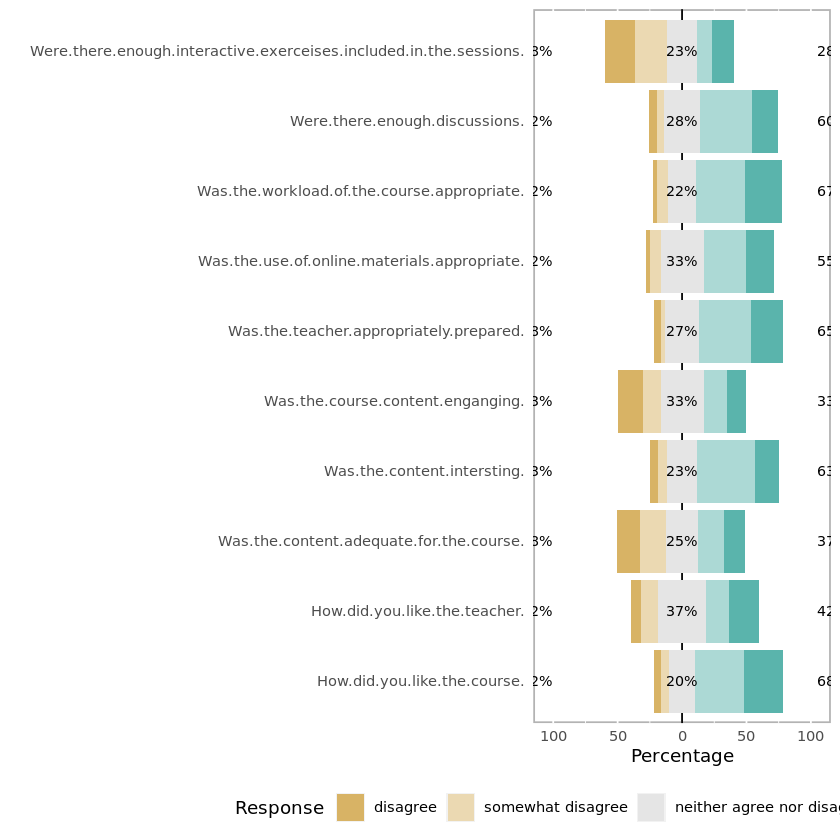

In [67]:
plot(likert(survey[,3:12]), ordered = F, wrap= 60)

To save this plot, you can use the save_plot function from the cowplot package as shown below.

In [78]:
survey_p1 <- plot(likert(survey[,3:12]), ordered = F, wrap= 60)
# save plot
#cowplot::save_plot(here("images", "stu_p1.png"), # where to save the plot
#                   survey_p1,        # object to plot
#                   base_asp = 1.5,  # ratio of space fro questions vs space for plot
#                   base_height = 8) # size! higher for smaller font size

An additional and very helpful feature is that the likert package enables grouping the data as shown below. The display columns 3 to 8 and use column 1 for grouping.

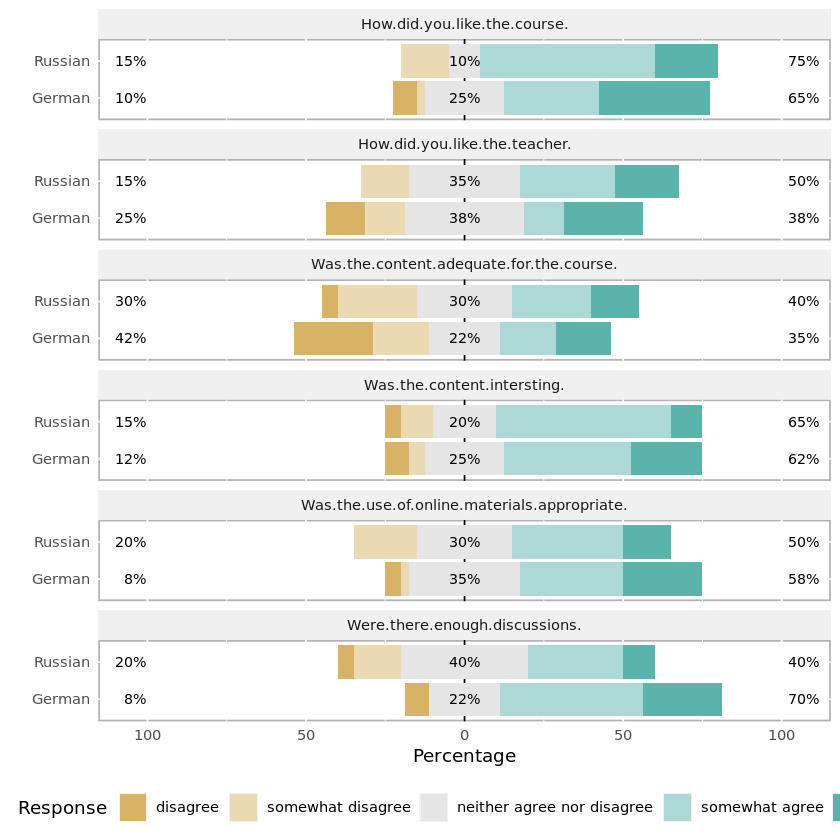

In [79]:
# create plot
plot(likert(survey[,3:8], grouping = survey[,1]))

# Useful Statistics to evaluate Survey data

Evaluating the reliability of questions
Cronbach’s Alpha
Oftentimes several questions in one questionnaire aim to tap into the same cognitive concept or attitude or whatever we are interested in. The answers to these related questions should be internally consistent, i.e. the responses should correlate strongly and positively.

Cronbach’s α
 (Cronbach 1951) is measure of internal consistency or reliability that provides information on how strongly the responses to a set of questions correlate. The formula for Cronbach’s α
 is shown below (N: number of items, c¯
: average inter-item co-variance among items, v¯
: average variance).

α=N∗c¯v¯+(N−1)c¯

Calculating Cronbach’s alpha in R

We will now calculate Cronbach’s α
 in R. In a first step, we activate the “psych” package and load as well as inspect the data.

In [82]:
# load data
surveydata <- base::readRDS(url("https://slcladal.github.io/data/sud.rda", "rb"))
surveydata

Respondent,Q01_Outgoing,Q02_Outgoing,Q03_Outgoing,Q04_Outgoing,Q05_Outgoing,Q06_Intelligence,Q07_Intelligence,Q08_Intelligence,Q09_Intelligence,Q10_Intelligence,Q11_Attitude,Q12_Attitude,Q13_Attitude,Q14_Attitude,Q15_Attitude
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Respondent_01,4,5,4,4,5,2,3,3,2,2,3,3,2,3,3
Respondent_02,5,4,5,4,4,2,2,2,1,2,4,4,4,5,4
Respondent_03,5,4,4,5,5,2,1,1,2,2,5,4,4,4,4
Respondent_04,5,5,5,4,5,1,1,1,1,1,5,4,5,5,5
Respondent_05,4,5,4,5,5,2,2,1,2,1,4,5,4,5,5
Respondent_06,5,5,5,5,4,5,4,5,2,2,1,2,1,2,1
Respondent_07,4,5,4,5,5,4,5,4,4,5,2,1,1,2,1
Respondent_08,4,4,5,4,5,5,4,5,4,5,1,2,1,1,2
Respondent_09,5,5,4,4,4,5,5,4,4,5,1,2,2,1,2


The inspection of the data shows that the responses of participants represent the rows and that the questions represent columns. The column names show that we have 15 questions and that the first five questions aim to test how outgoing respondents are. To check if the first five questions reliably test “outgoingness” (or “extraversion”), we calculate Cronbach’s alpha for these five questions.

Thus, we use the “alpha()” function and provide the questions that tap into the concept we want to assess. In addition to Cronbach’s α
, the “alpha()” function also reports Guttman’s lambda_6 which is an alternative measure for reliability. This is an advantage because Cronbach’s α
 underestimates the reliability of a test and overestimates the first factor saturation.

In [83]:
# calculate cronbach's alpha
Cronbach <- psych::alpha(surveydata[c("Q01_Outgoing",   
                   "Q02_Outgoing",  
                   "Q03_Outgoing",  
                   "Q04_Outgoing",  
                   "Q05_Outgoing")], check.keys=F)
# inspect results
Cronbach


Reliability analysis   
Call: psych::alpha(x = surveydata[c("Q01_Outgoing", "Q02_Outgoing", 
    "Q03_Outgoing", "Q04_Outgoing", "Q05_Outgoing")], check.keys = F)

  raw_alpha std.alpha G6(smc) average_r S/N    ase mean  sd median_r
      0.98      0.98    0.97      0.89  42 0.0083  3.1 1.5      0.9

 lower alpha upper     95% confidence boundaries
0.96 0.98 0.99 

 Reliability if an item is dropped:
             raw_alpha std.alpha G6(smc) average_r S/N alpha se   var.r med.r
Q01_Outgoing      0.97      0.97    0.97      0.89  33   0.0108 0.00099  0.89
Q02_Outgoing      0.97      0.97    0.96      0.89  31   0.0116 0.00054  0.89
Q03_Outgoing      0.97      0.97    0.97      0.90  35   0.0104 0.00095  0.90
Q04_Outgoing      0.97      0.97    0.96      0.89  31   0.0115 0.00086  0.89
Q05_Outgoing      0.98      0.98    0.97      0.91  41   0.0088 0.00034  0.91

 Item statistics 
              n raw.r std.r r.cor r.drop mean  sd
Q01_Outgoing 20  0.96  0.96  0.95   0.94  3.1 1.5
Q02_Outg

The output of the “alpha()” function is rather extensive and we will only interpret selected output here.

The value under alpha is Cronbach’s α
 and it should be above 0.7. The values to its left and right are the lower and upper bound of its confidence interval. The values in the column with the header “G6” show how well each question represents the concept it aims to reflect. Low values indicate that the question does not reflect the underlying concept while high values (.7 and higher) indicate that the question captures that concept well (or to an acceptable degree)

Omega
The omega (ω
) coefficient is also a reliability measure of internal consistency. ω
 represents an estimate of the general factor saturation of a test that was proposed by McDonald. (Zinbarg et al. 2005) compare McDonald’s Omega to Cronbach’s α
 and Revelle’s β
. They conclude that omega is the best estimate (Zinbarg et al. 2006).

A very handy way to calculate McDonald’s ω
 is to use the scaleReliability() function from the userfriendlyscience package (which also provides Cronbach’s α
 and the Greatest Lower Bound (GLB) estimate which is also a very good and innovative measure of reliability) (see also Peters 2014).

In [84]:
# activate package
library(ufs)
# extract reliability measures
reliability <- ufs::scaleStructure(surveydata[c("Q01_Outgoing", 
                                                "Q02_Outgoing", 
                                                "Q03_Outgoing", 
                                                "Q04_Outgoing", 
                                                "Q05_Outgoing")])
# inspect results
print(reliability)

Loading required namespace: GPArotation




Information about this analysis:

                 Dataframe: surveydata[c("Q01_Outgoing", "Q02_Outgoing", "Q03_Outgoing", 
                     Items: all
              Observations: 20
     Positive correlations: 10 out of 10 (100%)

Estimates assuming interval level:
 
Information about this analysis:

                 Dataframe:     "Q04_Outgoing", "Q05_Outgoing")]
                     Items: all
              Observations: 20
     Positive correlations: 10 out of 10 (100%)

Estimates assuming interval level:

             Omega (total): 0.98
      Omega (hierarchical): 0.95
   Revelle's omega (total): 0.98
Greatest Lower Bound (GLB): 0.99
             Coefficient H: 0.98
         Coefficient alpha: 0.98

(Estimates assuming ordinal level not computed, as the polychoric correlation matrix has missing values.)

Note: the normal point estimate and confidence interval for omega are based on the procedure suggested by Dunn, Baguley & Brunsden (2013) using the MBESS function ci.reliabi

Factor analysis
When dealing with many variables it is often the case that several variables are related and represent a common, underlying factor. To find such underlying factors, we can use a factor analysis.

Factor analysis is a method that allows to find commonalities or structure in data. This is particularly useful when dealing with many variables. Factors can be considered hidden latent variables or driving forces that affect or underlie several variables at once.

This becomes particularly apparent when considering socio-demographic variables as behaviors are not only dependent on single variables, e.g., economic status, but on the interaction of several additional variables such as education level, marital status, number of children, etc. All of these variables can be combined into a single factor (or hidden latent variable).

In [85]:
# remove respondent
surveydata <- surveydata %>% 
  dplyr::select(-Respondent)
factoranalysis <- factanal(surveydata, 3, rotation="varimax")
print(factoranalysis, digits=2, cutoff=.2, sort=TRUE)


Call:
factanal(x = surveydata, factors = 3, rotation = "varimax")

Uniquenesses:
    Q01_Outgoing     Q02_Outgoing     Q03_Outgoing     Q04_Outgoing 
            0.09             0.06             0.12             0.07 
    Q05_Outgoing Q06_Intelligence Q07_Intelligence Q08_Intelligence 
            0.14             0.10             0.13             0.10 
Q09_Intelligence Q10_Intelligence     Q11_Attitude     Q12_Attitude 
            0.28             0.41             0.08             0.14 
    Q13_Attitude     Q14_Attitude     Q15_Attitude 
            0.04             0.09             0.06 

Loadings:
                 Factor1 Factor2 Factor3
Q06_Intelligence -0.82    0.25    0.41  
Q07_Intelligence -0.80            0.47  
Q08_Intelligence -0.85            0.42  
Q09_Intelligence -0.79            0.29  
Q11_Attitude      0.96                  
Q12_Attitude      0.92                  
Q13_Attitude      0.97                  
Q14_Attitude      0.95                  
Q15_Attitude      0.

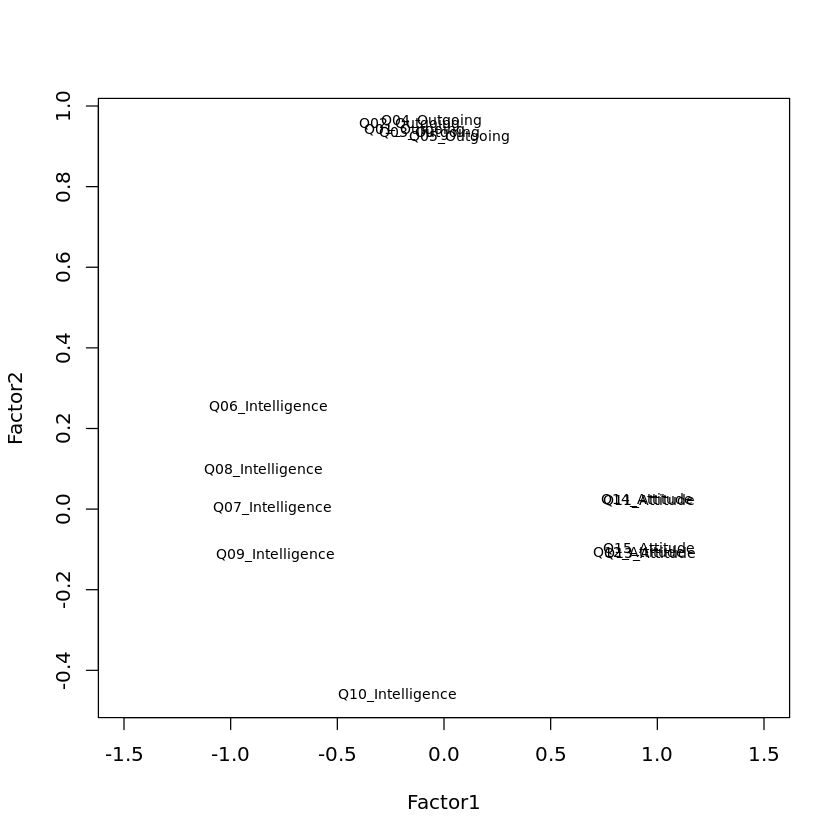

In [86]:
#The results of a factor analysis can be visualized so that questions which reflect the same underlying factor are grouped together.
# plot factor 1 by factor 2
load <- factoranalysis$loadings[,1:2]
# set up plot
plot(load, type="n", xlim = c(-1.5, 1.5)) 
# add variable names
text(load,
     # define labels
     labels=names(surveydata),
     # define font size 
     # (smaller than default = values smaller than 1)
     cex=.7)  

The plot shows that the questions form groups which indicates that the questions do a rather good job at reflecting the concepts that they aim to tap into. The only problematic question is question 10 (Q10) which aimed to tap into the intelligence of respondents but appears not to correlate strongly with the other questions that aim to extract information about the respondents intelligence. In such cases, it makes sense, to remove a question (in this case Q10) from the survey as it does not appear to reflect what we wanted it to.

Principle component analysis
Principal component analysis is used when several questions or variables reflect a common factor and they should be combined into a single variable, e.g. during the statistical analysis of the data. Thus, principal component analysis can be used to collapse different variables (or questions) into one.

Imagine you have measured lengths of sentences in different ways (in words, syllables, characters, time it takes to pronounce, etc.). You could combine all these different measures of length by applying a PCA to those measures and using the first principal component as a single proxy for all these different measures.

In [87]:
# entering raw data and extracting PCs  from the correlation matrix
PrincipalComponents <- princomp(surveydata[c("Q01_Outgoing",    
                   "Q02_Outgoing",  
                   "Q03_Outgoing",  
                   "Q04_Outgoing",  
                   "Q05_Outgoing")], cor=TRUE)
summary(PrincipalComponents) # print variance accounted for

Importance of components:
                       Comp.1  Comp.2  Comp.3  Comp.4  Comp.5
Standard deviation     2.1399 0.41221 0.33748 0.29870 0.21818
Proportion of Variance 0.9159 0.03398 0.02278 0.01784 0.00952
Cumulative Proportion  0.9159 0.94986 0.97264 0.99048 1.00000

The output shows that the first component (Comp.1) explains 91.58 percent of the variance. This shows that we only lose 8.42 percent of the variance if we use this component as a proxy for “outgoingness” if we use the collapsed component rather than the five individual items.

In [88]:
loadings(PrincipalComponents) # pc loadings


Loadings:
             Comp.1 Comp.2 Comp.3 Comp.4 Comp.5
Q01_Outgoing  0.448  0.324         0.831       
Q02_Outgoing  0.453  0.242 -0.408 -0.360  0.663
Q03_Outgoing  0.446  0.405  0.626 -0.405 -0.286
Q04_Outgoing  0.452 -0.191 -0.568 -0.114 -0.650
Q05_Outgoing  0.437 -0.798  0.342         0.230

               Comp.1 Comp.2 Comp.3 Comp.4 Comp.5
SS loadings       1.0    1.0    1.0    1.0    1.0
Proportion Var    0.2    0.2    0.2    0.2    0.2
Cumulative Var    0.2    0.4    0.6    0.8    1.0

We now check if the five questions that are intended to tap into “outgoingness” represent one (and not more) underlying factors. Do check this, we create a scree plot.

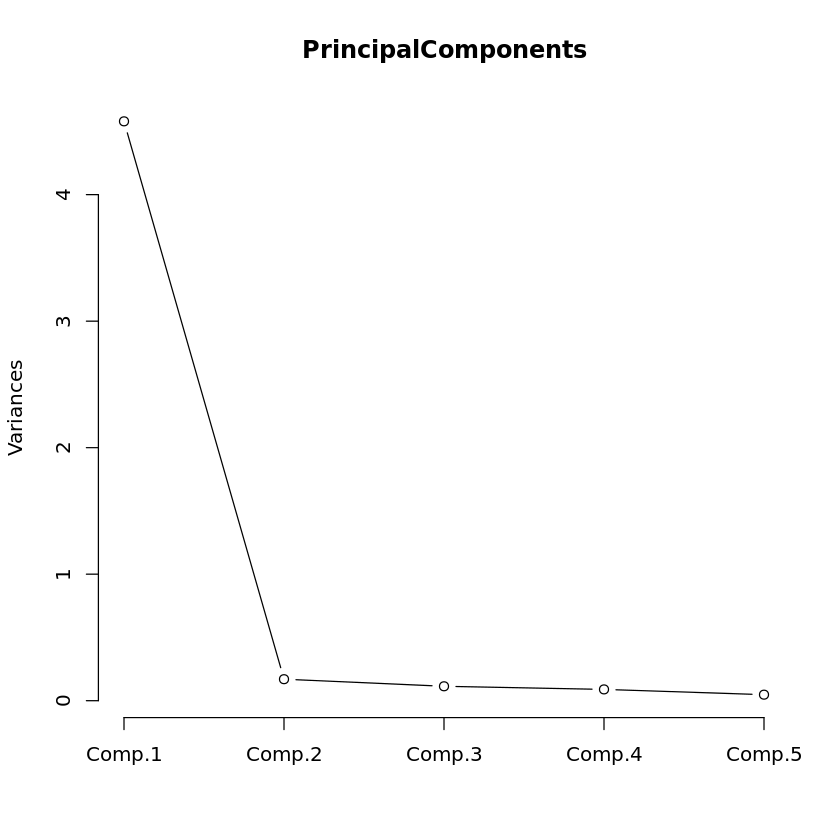

In [89]:
plot(PrincipalComponents,type="lines") # scree plot

The scree plot shown above indicates that we only need a single component to explain the variance as there is a steep decline from the first to the second component. This confirms that the questions that tap into “outgoingness” represent one (and not more) underlying factors.

In [90]:
PrincipalComponents$scores # the principal components

Comp.1,Comp.2,Comp.3,Comp.4,Comp.5
1.8382,-0.36615,-0.05472,-0.185983,0.45152
1.8663,0.49141,0.43588,0.293521,-0.29327
2.1436,-0.43110,-0.14566,0.529200,-0.37631
2.4440,0.12865,0.39433,0.093406,0.28596
2.1362,-0.49210,-0.42957,-0.260901,0.02262
2.4574,0.52188,-0.20319,-0.014602,-0.29283
2.1362,-0.49210,-0.42957,-0.260901,0.02262
1.8506,-0.24517,0.63889,-0.230286,-0.17380
1.8538,0.37043,-0.25773,0.337824,0.33205
1.8589,0.43041,0.15198,-0.496581,0.10566


Ordinal Regression
Ordinal regression is very similar to multiple linear regression but takes an ordinal dependent variable (Agresti 2010). For this reason, ordinal regression is one of the key methods in analyzing Likert data.

To see how an ordinal regression is implemented in R, we load and inspect the “ordinaldata” data set. The data set consists of 400 observations of students that were either educated at this school (Internal = 1) or not (Internal = 0). Some of the students have been abroad (Exchange = 1) while other have not (Exchange = 0). In addition, the data set contains the students’ final score of a language test (FinalScore) and the dependent variable which the recommendation of a committee for an additional, very prestigious program. The recommendation has three levels (“very likely”, “somewhat likely”, and “unlikely”) and reflects the committees’ assessment of whether the student is likely to succeed in the program.

In [91]:
# load data
ordata <- base::readRDS(url("https://slcladal.github.io/data/oda.rda", "rb"))
# inspect data
str(ordata)

'data.frame':	400 obs. of  4 variables:
 $ Recommend : chr  "very likely" "somewhat likely" "unlikely" "somewhat likely" ...
 $ Internal  : int  0 1 1 0 0 0 0 0 0 1 ...
 $ Exchange  : int  0 0 1 0 0 1 0 0 0 0 ...
 $ FinalScore: num  3.26 3.21 3.94 2.81 2.53 ...


In a first step, we need to re-level the ordinal variable to represent an ordinal factor (or a progression from “unlikely” over “somewhat likely” to “very likely”. And we will also factorize Internal and Exchange to make it easier to interpret the output later on.

In [93]:
# relevel data
ordata <- ordata %>%
dplyr::mutate(Recommend = factor(Recommend, 
                           levels=c("unlikely", "somewhat likely", "very likely"),
                           labels=c("unlikely",  "somewhat likely",  "very likely"))) %>%
  dplyr::mutate(Exchange = ifelse(Exchange == 1, "Exchange", "NoExchange")) %>%
  dplyr::mutate(Internal = ifelse(Internal == 1, "Internal", "External"))

Now that the dependent variable is re-leveled, we check the distribution of the variable levels by tabulating the data. To get a better understanding of the data we create frequency tables across variables rather than viewing the variables in isolation.

In [94]:
## three way cross tabs (xtabs) and flatten the table
ftable(xtabs(~ Exchange + Recommend + Internal, data = ordata))

                           Internal External Internal
Exchange   Recommend                                 
Exchange   unlikely                       25        6
           somewhat likely                12        4
           very likely                     7        3
NoExchange unlikely                      175       14
           somewhat likely                98       26
           very likely                    20       10

In [95]:
#We also check the mean and standard deviation of the final score as final score is a numeric variable and cannot be tabulated (unless we convert it to a factor).
summary(ordata$FinalScore); sd(ordata$FinalScore)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.90    2.72    2.99    3.00    3.27    4.00 

[1] 0.3979

The lowest score is 1.9 and the highest score is a 4.0 with a mean of approximately 3. Finally, we inspect the distributions graphically.

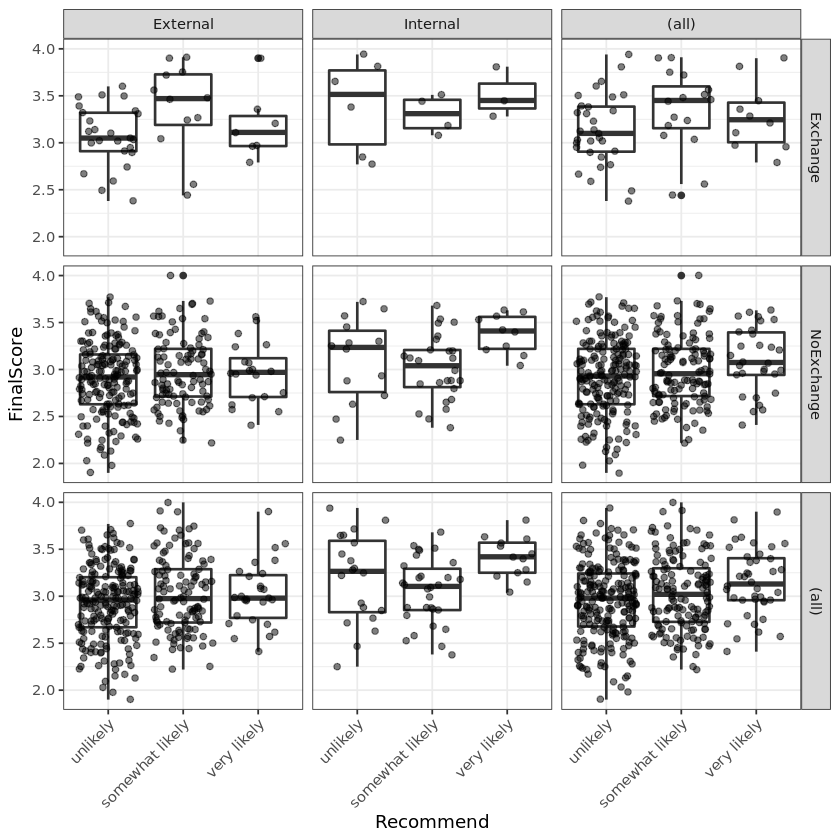

In [96]:
# visualize data
ordata %>%
  ggplot(aes(x = Recommend, y = FinalScore)) +
  geom_boxplot(size = .75) +
  geom_jitter(alpha = .5) +
  facet_grid(Exchange ~ Internal, margins = TRUE) +
  theme_bw() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1))

We see that we have only few students that have taken part in an exchange program and there are also only few internal students overall. With respect to recommendations, only few students are considered to very likely succeed in the program. We can now start with the modelling by using the “polr” function. To make things easier for us, we will only consider the main effects here as this tutorial only aims to how to implement an ordinal regression but not how it should be done in a proper study - then, the model fitting and diagnostic procedures would have to be performed accurately, of course.

In [97]:
## fit ordered logit model and store results 'm'
m <- polr(Recommend ~ Internal + Exchange + FinalScore, data = ordata, Hess=TRUE)
## view a summary of the model
summary(m)

Call:
polr(formula = Recommend ~ Internal + Exchange + FinalScore, 
    data = ordata, Hess = TRUE)

Coefficients:
                    Value Std. Error t value
InternalInternal   1.0477      0.266   3.942
ExchangeNoExchange 0.0587      0.298   0.197
FinalScore         0.6157      0.261   2.363

Intercepts:
                            Value Std. Error t value
unlikely|somewhat likely    2.262 0.882      2.564  
somewhat likely|very likely 4.357 0.904      4.818  

Residual Deviance: 717.02 
AIC: 727.02 

The results show that having studied here at this school increases the chances of receiving a positive recommendation but that having been on an exchange has a negative but insignificant effect on the recommendation. The final score also correlates positively with a positive recommendation but not as much as having studied here.

In [98]:
## store table
(ctable <- coef(summary(m)))

,Value,Std. Error,t value
InternalInternal,1.04766,0.2658,3.942
ExchangeNoExchange,0.05868,0.2979,0.197
FinalScore,0.61574,0.2606,2.363
unlikely|somewhat likely,2.26200,0.8822,2.564
somewhat likely|very likely,4.35744,0.9045,4.818


As the regression report does not provide p-values, we have to calculate them separately (after having calculated them, we add them to the coefficient table).

In [100]:
## calculate and store p values
p <- pnorm(abs(ctable[, "t value"]), lower.tail = FALSE) * 2
## combined table
(ctable <- cbind(ctable, "p value" = p))

,Value,Std. Error,t value,p value
InternalInternal,1.04766,0.2658,3.942,0.000080902
ExchangeNoExchange,0.05868,0.2979,0.197,0.843819939
FinalScore,0.61574,0.2606,2.363,0.018151727
unlikely|somewhat likely,2.26200,0.8822,2.564,0.010343823
somewhat likely|very likely,4.35744,0.9045,4.818,0.000001452


As predicted, Exchange does not have a significant effect but FinalScore and Internal both correlate significantly with the likelihood of receiving a positive recommendation.

In [101]:
# extract profiled confidence intervals
ci <- confint(m)
# calculate odds ratios and combine them with profiled CIs
exp(cbind(OR = coef(m), ci))

Waiting for profiling to be done...



,OR,2.5 %,97.5 %
InternalInternal,2.851,1.696,4.817
ExchangeNoExchange,1.060,0.595,1.920
FinalScore,1.851,1.114,3.098


The odds ratios show that internal students are 2.85 or 285 percent more likely compared to non-internal students to receive positive evaluations and that a 1-point increase in the test score lead to a 1.85 or 185 percent increase in the chances of receiving a positive recommendation. The effect of an exchange is slightly negative but, as we have seen above, not significant.

In a final step, we will visualize the results of the ordinal regression model. To do that, we need to reformat the data and add the predictions.

In [102]:
# extract predictions
predictions <- predict(m, data = ordata, type = "prob")
# add predictions to the data
newordata <- cbind(ordata, predictions)
# rename columns
colnames(newordata)[6:7] <- c("somewhat_likely", "very_likely")
# reformat data
newordata <- newordata %>%
  dplyr::select(-Recommend) %>%
  tidyr::gather(Recommendation, Probability, unlikely:very_likely)  %>%
  dplyr::mutate(Recommendation = factor(Recommendation, 
                                        levels = c("unlikely",
                                                   "somewhat_likely",
                                                   "very_likely")))

In [106]:
newordata %>%
  as.data.frame() %>%
  head(10) %>%
  flextable() %>%
  flextable::set_table_properties(width = .5, layout = "autofit") %>%
  flextable::theme_zebra() %>%
  flextable::fontsize(size = 12) %>%
  flextable::fontsize(size = 12, part = "header") %>%
  flextable::align_text_col(align = "center") %>%
  flextable::set_caption(caption = "First 10 rows of the newordata.")  %>%
  flextable::border_outer()



a flextable object.
col_keys: `Internal`, `Exchange`, `FinalScore`, `Recommendation`, `Probability` 
header has 1 row(s) 
body has 10 row(s) 
original dataset sample: 
  Internal   Exchange FinalScore Recommendation Probability
1 External NoExchange       3.26       unlikely      0.5488
2 Internal NoExchange       3.21       unlikely      0.3056
3 Internal   Exchange       3.94       unlikely      0.2294
4 External NoExchange       2.81       unlikely      0.6161
5 External NoExchange       2.53       unlikely      0.6560

In [107]:
head(newordata,10)

,Internal,Exchange,FinalScore,Recommendation,Probability
,<chr>,<chr>,<dbl>,<fct>,<dbl>
1,External,NoExchange,3.26,unlikely,0.5488
2,Internal,NoExchange,3.21,unlikely,0.3056
3,Internal,Exchange,3.94,unlikely,0.2294
4,External,NoExchange,2.81,unlikely,0.6161
5,External,NoExchange,2.53,unlikely,0.6560
6,External,Exchange,2.59,unlikely,0.6609
7,External,NoExchange,2.56,unlikely,0.6518
8,External,NoExchange,2.73,unlikely,0.6277
9,External,NoExchange,3.00,unlikely,0.5881


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



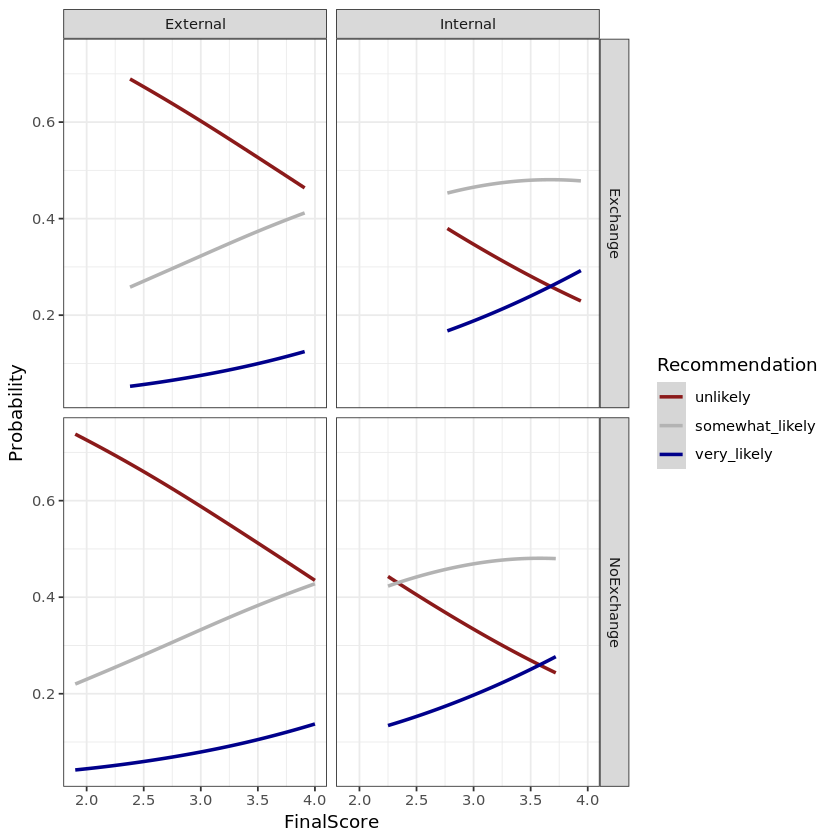

In [108]:
#We can now visualize the predictions of the model.
# bar plot
newordata %>%
  ggplot(aes(x = FinalScore, Probability,
             color = Recommendation, 
             group = Recommendation)) + 
  facet_grid(Exchange~Internal) +
  geom_smooth() +  
  # define colors
  scale_fill_manual(values = clrs3) +
  scale_color_manual(values = clrs3) +
  theme_bw()  